# linear regreesion（线性回归）
注意：python版本为3.6，
安装TensorFlow的方法：pip install tensorflow

In [7]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [35]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit']) # 读取数据并赋予列名

In [9]:
df.head() # 看前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


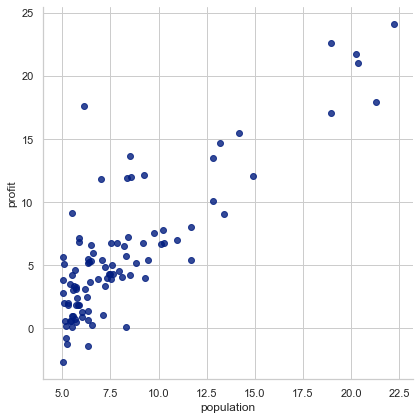

In [14]:
sns.lmplot('population', 'profit', df, size=6, fit_reg=False)
plt.show()

In [21]:
def get_X(df): # 读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))}) #ones是m行1列的dataframe,指全是1
    data = pd.concat([ones, df], axis=1) # 合并数据 根据列合并
    return data.iloc[:, :-1].values # 这个操作返回 ndarray,不是矩阵

def get_y(df): # 读取标签
    #     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1]) #df.iloc[:, -1] 是指df的最后一列

def normaliza_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std()) # 特征缩放


多变量的假设 h 表示为：\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。


In [18]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.train.GradientDescentOptimizer):# 这个函数是旧金山的一个大神Lucas Shen写的
      # placeholder for graph input
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)

    # construct the graph
    with tf.variable_scope('linear-regression'):
        W = tf.get_variable("weights",
                            (X_data.shape[1], 1),
                            initializer=tf.constant_initializer())  # n*1

        y_pred = tf.matmul(X, W)  # m*n @ n*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)

    # run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []

        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break

    # clear the graph
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val}  # just want to return in row vector format

AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'GradientDescentOptimizer'

In [38]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据，并赋予列名

data.head()#看下数据前5行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [40]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))

(6, 2) <class 'numpy.ndarray'>
(6,) <class 'numpy.ndarray'>


In [41]:
theta = np.zeros(X.shape[1])  #X.shape[1]=2,代表特征数n
print(theta)
print(X)
print(y)

[0. 0.]
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]]
[17.592   9.1302 13.662  11.854   6.8233 11.886 ]


In [42]:
def lr_cost(theta, X, y):
#     """
#     X: R(m*n), m 样本数, n 特征数
#     y: R(m)
#     theta : R(n), 线性回归的参数
#     """
    m = X.shape[0] # m为样本数
    print(X @ theta)
    inner = X @ theta - y # R(m*1)，X @ theta等价于X.dot(theta)
     # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    
    return cost

In [43]:
lr_cost(theta, X, y)#返回theta的值

[0. 0. 0. 0. 0. 0.]


75.65341624416668